In [19]:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_validate, ShuffleSplit, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score, f1_score, precision_recall_fscore_support 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sys.path.append('..')

In [36]:
def plot_roc_curve(fpr,tpr,model):
    fig = plt.figure(figsize=(6,6))
    ax = plt.gca()
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model+' ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [2]:
#not plotted roc curves since i had to run the models as all the variables got overwritten as everytime used the same variable
#and running each model taking so much time as we oversampled
#and when running the models again I will try to run ensemble model  


data_path = os.path.join(os.getcwd(), 'cup98lrn', 'CharityContribution_Learn.csv')
bristol = pd.read_csv(data_path)
bristol.shape
bristol.head()

,Origin_Year,Zipcode,Mail_Code,Do_Not_Exchange_Flag,In_House_File_Flag,P3_File_Flag,Planned_Giving_File_Flag,Sweepstakes_File_Flag,Neighborhood_Status.1,Demographic_Cluster,...,Frequecy_Code_For_Mdmaud__1,Frequecy_Code_For_Mdmaud__2,Frequecy_Code_For_Mdmaud__5,Donation_Amount_Code_For_Mdmaud__CoreDoner_100plus,Donation_Amount_Code_For_Mdmaud__LessDonor,Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus,Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus,Control_Number_(Unique_Record_Identifier),Target_B,Target_D
0,1924,56475,0,0,0,0,0,0,3,51,...,0,0,0,0,0,0,0,85548,0,0.0
1,1924,93527,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,160963,0,0.0
2,1924,55112,0,0,0,0,0,0,2,17,...,0,0,0,0,0,0,0,84035,0,0.0
3,1923,55066,0,0,0,0,0,0,2,36,...,0,0,0,0,0,0,0,82335,0,0.0
4,1925,33332,0,0,0,0,0,0,1,35,...,0,0,0,0,0,0,0,39327,0,0.0


In [3]:
data_path = os.path.join(os.getcwd(), 'cup98val', 'Charity_TEST.csv')
bristol_test = pd.read_csv(data_path)
bristol_test.shape
bristol_test.head()

,Origin_Year,Zipcode,Mail_Code,Do_Not_Exchange_Flag,In_House_File_Flag,P3_File_Flag,Planned_Giving_File_Flag,Sweepstakes_File_Flag,Neighborhood_Status.1,Demographic_Cluster,...,Frequecy_Code_For_Mdmaud__1,Frequecy_Code_For_Mdmaud__2,Frequecy_Code_For_Mdmaud__5,Donation_Amount_Code_For_Mdmaud__CoreDoner_100plus,Donation_Amount_Code_For_Mdmaud__LessDonor,Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus,Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus,Control_Number_(Unique_Record_Identifier),Target_B,Target_D
0,1925,98498,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,182234,0,0.0
1,1923,92868,0,0,0,0,0,0,2,7,...,0,0,0,0,0,0,0,157437,0,0.0
2,1924,33021,0,0,0,0,0,0,1,13,...,0,0,0,0,0,0,0,36709,0,0.0
3,1925,29154,0,0,0,0,0,0,3,33,...,0,0,0,0,0,0,0,32435,0,0.0
4,1924,35601,0,0,0,0,0,0,2,27,...,0,0,0,0,0,0,0,47772,0,0.0


In [4]:
#summarsing the data set
print("-------Info-------------\n")
print(bristol.info())
print("\n----------Describe---------")
print(bristol.describe())
print("------- Test Info-------------\n")
print(bristol_test.info())
print("\n----------Test Describe---------")
print(bristol_test.describe())

-------Info-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 1387 entries, Origin_Year to Target_D
dtypes: float64(32), int64(1355)
memory usage: 1009.6 MB
None

----------Describe---------
        Origin_Year       Zipcode     Mail_Code  Do_Not_Exchange_Flag  \
count  95412.000000  95412.000000  95412.000000          95412.000000   
mean    1924.592137  64270.904488      0.014663              0.003354   
std        1.074628  23961.245029      0.120199              0.057816   
min     1922.000000    801.000000      0.000000              0.000000   
25%     1924.000000  40502.000000      0.000000              0.000000   
50%     1925.000000  63105.500000      0.000000              0.000000   
75%     1926.000000  90008.000000      0.000000              0.000000   
max     1926.000000  99950.000000      1.000000              1.000000   

       In_House_File_Flag  P3_File_Flag  Planned_Giving_File_Flag  \
count        95412.000000  95412.

In [5]:
Donated = bristol_test[bristol_test['Target_B'] == 1].Target_B
not_donated = bristol_test[bristol_test['Target_B'] == 0].Target_B
print("Test Doanted :----",len(Donated)," out of ",bristol_test.shape[0])
print("test NOT Doanted :----",len(not_donated))

Test Doanted :---- 4390  out of  86526
test NOT Doanted :---- 82136


In [6]:
Donated = bristol[bristol['Target_B'] == 1].Target_B
not_donated = bristol[bristol['Target_B'] == 0].Target_B
print("Doanted :----",len(Donated)," out of ",bristol.shape[0])
print("NOT Doanted :----",len(not_donated))

Doanted :---- 4843  out of  95412
NOT Doanted :---- 90569


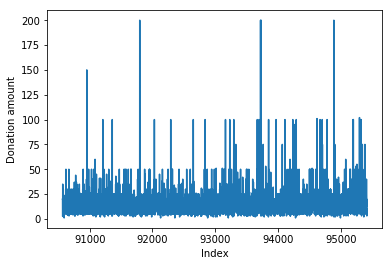

200.0 1.0


In [7]:
donation_amount = bristol[bristol['Target_D'] > 0.0].Target_D
plt.plot(donation_amount)
plt.xlabel("Index")
plt.ylabel("Donation amount")
plt.show()
print(max(donation_amount),min(donation_amount))

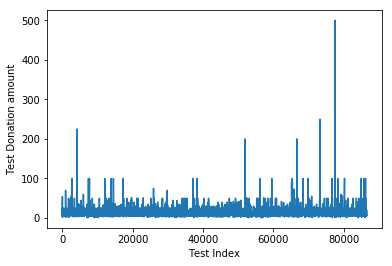

500.0 0.32


In [8]:
donation_amount = bristol_test[bristol_test['Target_D'] > 0.0].Target_D
plt.plot(donation_amount)
plt.xlabel("Test Index")
plt.ylabel("Test Donation amount")
plt.show()
print(max(donation_amount),min(donation_amount))

In [ ]:
#finding correlation between target variables and other factors
target_b_corr = bristol.corr()["Target_B"].copy()
print(len(target_b_corr))
postive_corr = target_b_corr.loc[target_b_corr > 0.0]
negative_corr = target_b_corr.loc[target_b_corr < 0.0]
neutral_corr = target_b_corr.loc[target_b_corr == 0.0]

Index(['Origin_Year', 'Mail_Code', 'Do_Not_Exchange_Flag',
       'Sweepstakes_File_Flag', 'Neighborhood_Status.1', 'Demographic_Cluster',
       'Number_Of_Children_Calcutated', 'Number_Of_Children',
       'Buy_Collectables', 'Do_It_Yourself_Pubs',
       ...
       'Date_Of_Second_Gift__9607', 'Date_Of_Second_Gift__9608',
       'Date_Of_Second_Gift__9610', 'Date_Of_Second_Gift__9612',
       'Date_Of_Second_Gift__9702', 'Recency_Code_For_Mdmaud__DormantDonor',
       'Recency_Code_For_Mdmaud__LapsedDonor', 'Frequecy_Code_For_Mdmaud__5',
       'Donation_Amount_Code_For_Mdmaud__MajorDoner_500plus',
       'Donation_Amount_Code_For_Mdmaud__TopDonor_1000plus'],
      dtype='object', length=579)
Index(['Zipcode', 'In_House_File_Flag', 'P3_File_Flag',
       'Planned_Giving_File_Flag', 'Overlay_Age', 'Calculated_Age',
       'Home_Owner_Flag', 'Household_Income', 'Wealth_Rating',
       'Num_Mail_Order_Response',
       ...
       'Date_Of_Second_Gift__9701', 'Recency_Code_For_Mdmaud__C

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

<Figure size 1440x1440 with 1 Axes>

ValueError: 
Major_($$)_Donor_Flag
       ^
Expected end of text, found '$'  (at char 7), (line:1, col:8)

<Figure size 1440x1440 with 1 Axes>

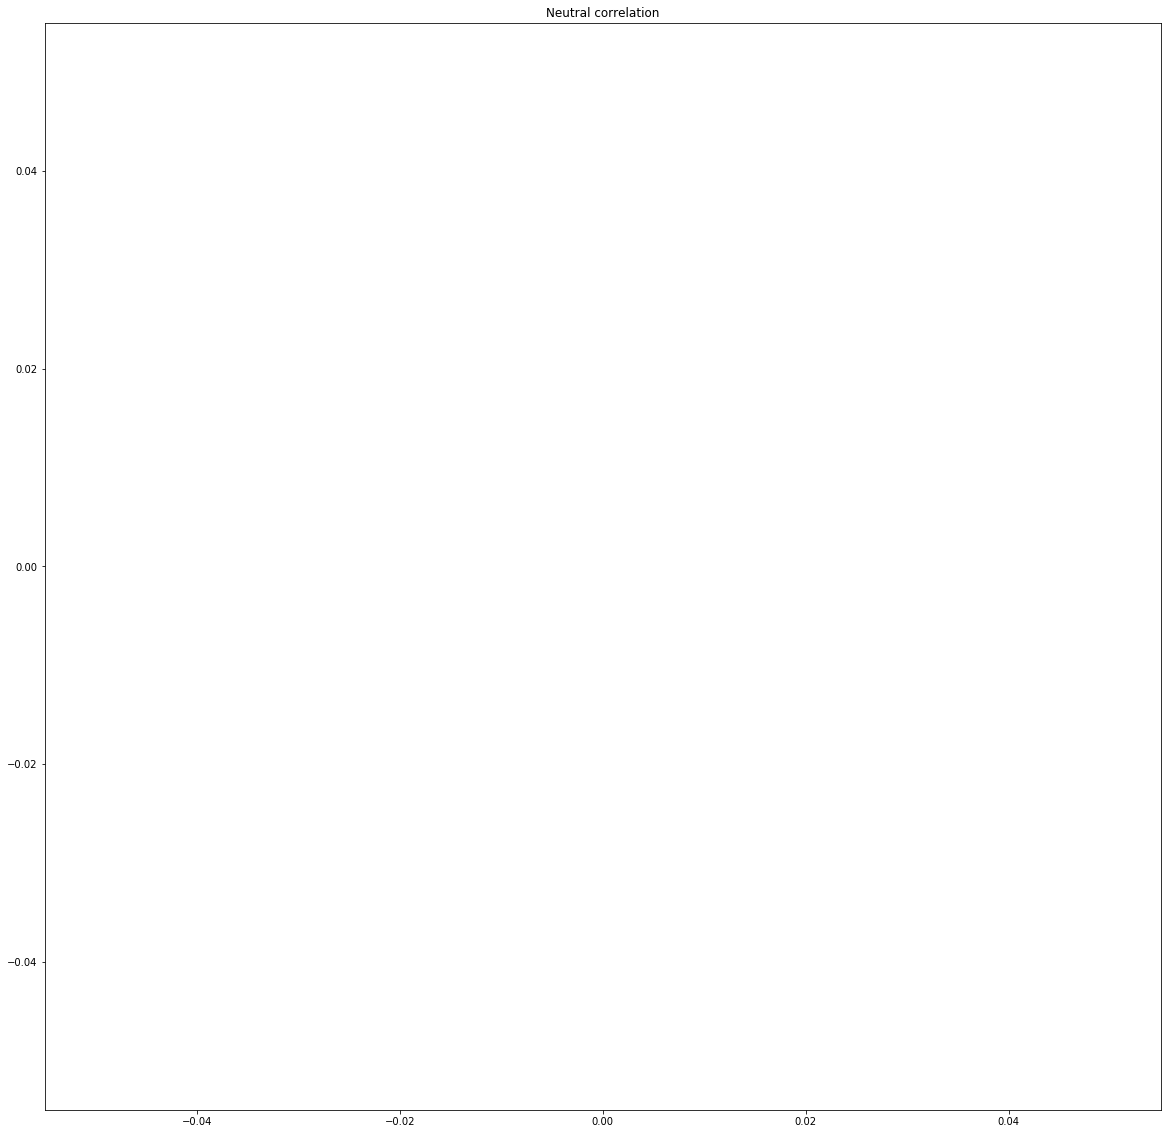

In [30]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_corr)
plt.title("Negative correlation")
print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_corr)
plt.title("Positive correlation")
print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_corr)
plt.title("Neutral correlation")
print(pd.DataFrame(neutral_corr).index)

In [31]:
print(pd.DataFrame(postive_corr).sort_values('Target_B'))

                                                        Target_B
Date_The_Gift_Was_Received_For_95Cc__9503           5.402108e-07
Percent_Puerto_Rican                                3.716082e-06
Date_The_Gift_Was_Received_For_96Xk__9601           9.207201e-06
Major_($$)_Donor_Flag                               6.625607e-05
Date_The_Gift_Was_Received_For_94Nk__9502           6.818325e-05
Date_Of_First_Gift__9204                            9.393209e-05
Date_The_Gift_Was_Received_For_95Wl__9507           1.204087e-04
Date_The_Gift_Was_Received_For_95Tk__9504           1.204087e-04
Donor_Title__GOVER                                  1.204087e-04
Number_Of_Months_Between_First_And_Second_Gift      1.355296e-04
Date_Of_First_Gift__8702                            1.460882e-04
Date_Of_First_Gift__9502                            1.644309e-04
State__Pennsylvania                                 1.703005e-04
Date_Of_First_Gift__8712                            1.942293e-04
Childern_4-7__Child_Femal

In [32]:
print(pd.DataFrame(negative_corr).sort_values('Target_B'))

                                                  Target_B
Donation_Amount_Code_For_Rfa_2                   -0.070026
Donor_97Nk_Price_Of_Gift                         -0.070026
Donor_96Nk_Price_Of_Gift                         -0.053168
Donor_96Tk_Price_Of_Gift                         -0.050566
Donor_96Ll_Price_Of_Gift                         -0.043361
Dollar_Amount_Of_Most_Recent_Gift                -0.035526
Average_Dollar_Amount_Of_Gifts_To_Date           -0.032444
Donor_96G4_Price_Of_Gift                         -0.032181
Dollar_Amount_Of_Smallest_Gift_To_Date           -0.031008
Origin_Year                                      -0.031001
Date_Associated_With_The_Largest_Gift_To_Date    -0.026461
Donor_96Gk_Price_Of_Gift                         -0.023312
Percent_Female_Householder_W/_Child              -0.021762
Neighborhood_Status.1                            -0.020703
Percent_Single_Parent_Households                 -0.020671
Date_The_96G1_Promotion_Was_Mailed__9601         -0.0203

In [33]:
target_d_corr = bristol.corr()["Target_D"].copy()

In [34]:
print(len(target_d_corr))
postive_d_corr = target_d_corr.loc[target_d_corr > 0.0]
negative_d_corr = target_d_corr.loc[target_d_corr < 0.0]
neutral_d_corr = target_d_corr.loc[target_d_corr == 0.0]

1387


Text(0.5,1,'Neutral correlation')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021C78B66048> (for post_execute):


ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

ValueError: 
15,000_-_
         ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 9), (line:1, col:10)

<Figure size 1440x1440 with 1 Axes>

ValueError: 
Major_($$)_Donor_Flag
       ^
Expected end of text, found '$'  (at char 7), (line:1, col:8)

<Figure size 1440x1440 with 1 Axes>

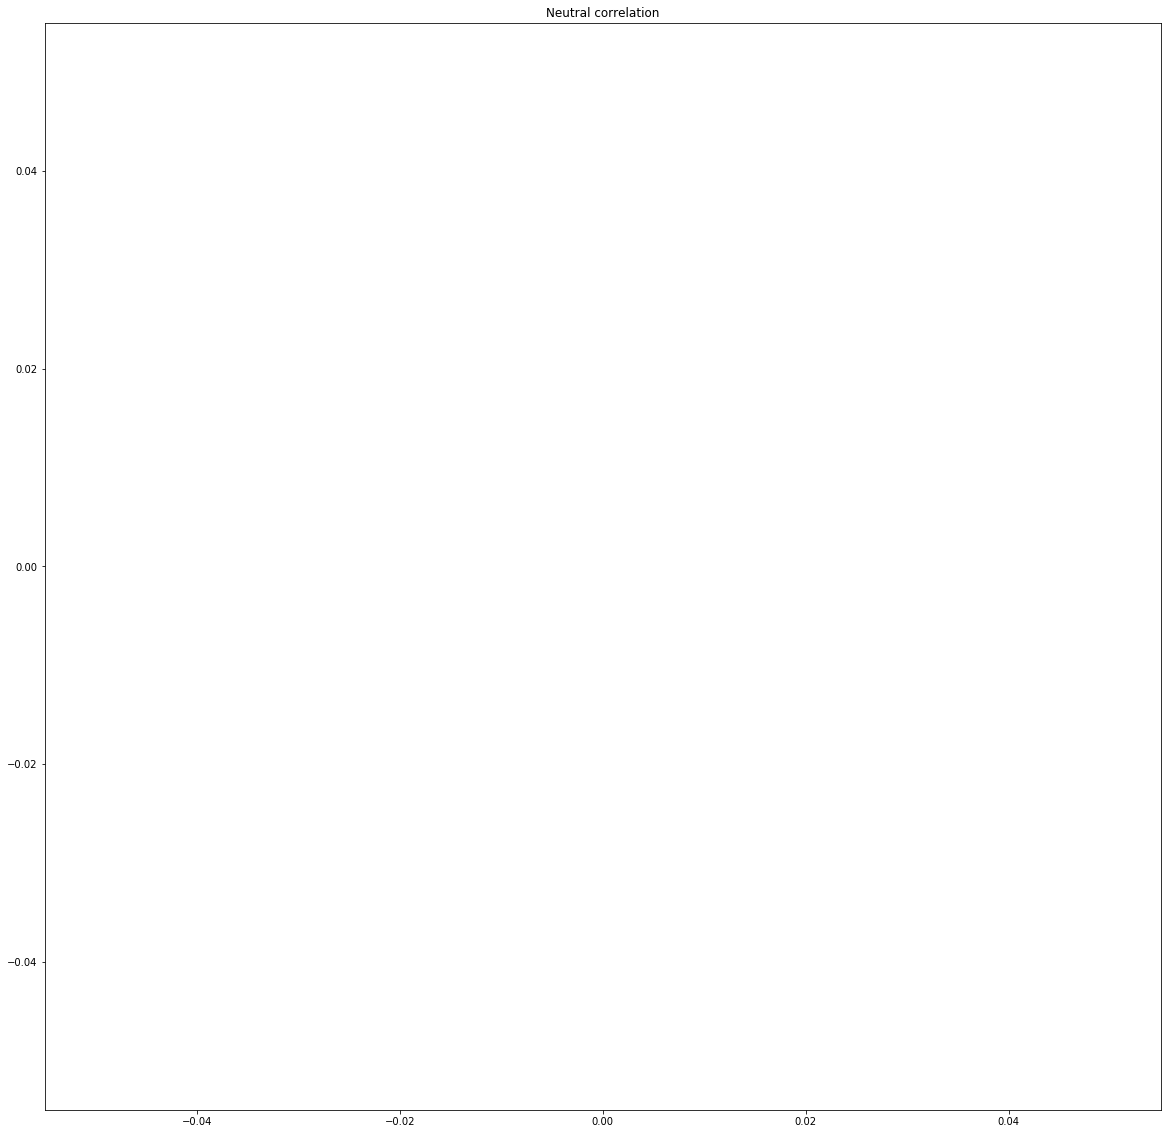

In [13]:
np.set_printoptions(threshold=sys.maxsize)
plt.figure(1, figsize=((20,20)))
plt.plot(negative_d_corr)
plt.title("Negative correlation")
#print(pd.DataFrame(negative_corr).index)
plt.figure(2, figsize=((20,20)))
plt.plot(postive_d_corr)
plt.title("Positive correlation")
#print(pd.DataFrame(postive_corr).index)
plt.figure(3, figsize=((20,20)))
plt.plot(neutral_d_corr)
plt.title("Neutral correlation")
#print(pd.DataFrame(neutral_corr).index)

In [14]:
print("positive",pd.DataFrame(postive_d_corr).sort_values('Target_D'))   #### target b and target d are highly correlated
print("Negative",pd.DataFrame(negative_d_corr).sort_values('Target_D'))

positive                                                     Target_D
Date_The_Gift_Was_Received_For_95Ll__07/10/1925     0.000034
Dollar_Amount_Of_The_Gift_For_96Wl                  0.000040
Percent_Detached_Single_Unit_Structure              0.000059
Date_The_Gift_Was_Received_For_95Tk__08/01/1926     0.000065
EPVA/PVA_Northeastern_US__PVA_State                 0.000071
Date_Of_First_Gift__15/04/1923                      0.000072
Donor_95X2_Status                                   0.000086
Percent_Males_In_Active_Military_Service            0.000101
Date_The_Gift_Was_Received_For_94Nk__26/06/1925     0.000102
Date_Of_First_Gift__15/01/1926                      0.000143
Children_0-3__Child_Female                          0.000145
Date_Of_First_Gift__10/01/1926                      0.000168
State__Nevada                                       0.000178
Date_The_Gift_Was_Received_For_95Gk__07/01/1926     0.000190
Date_Of_Second_Gift__13/02/1924                     0.000201
Date_Of_Second_

In [4]:
#bristol -original
#bristol_removedD -removed targetD
#bristol_test -original test dataset
unwanted_cols = []
bristol_removedD = bristol.drop('Target_D',axis=1)
bristol_dat = bristol_removedD.var()
unwanted_cols.extend(bristol_dat.index[bristol_dat < 0.001])
#remove columns which are mostly sparse i.e columns that contain less than 1 % of total data
unwanted_cols.extend(bristol.columns[bristol.count() < int(bristol.shape[0] * 0.01)])
bristol_preprocessed = bristol.drop(unwanted_cols,axis=1)
#bristol_test_preprocessed = bristol.drop(unwanted_cols,axis=1)
#imputation of mean values for int and float and for object mode values
for col in bristol_preprocessed:
    if len(bristol_preprocessed.loc[bristol_preprocessed[col].isna()]) != 0:
        if str(bristol_preprocessed[col].dtypes) == 'int64' or str(bristol_preprocessed[col].dtypes) == 'float64':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mean(skipna=True),inplace=True)
        elif str(bristol_preprocessed[col].dtypes) == 'object':
            bristol_preprocessed[col].fillna(bristol_preprocessed[col].mode().iloc[0],inplace=True)
print(unwanted_cols)

['Donor_97Nk_Status', 'Donor_Status_1997', 'Donor_Title__ARMY', 'Donor_Title__GOVER', 'Donor_Title__RELIGIOUS', 'State__0', 'State__Armed_Forces_Africa', 'State__Armed_Forces_Americas', 'State__Armed_Forces_Pacific', 'State__Connecticut', 'State__Delaware', 'State__District_of_Columbia', 'State__Maine', 'State__Maryland', 'State__Massachusetts', 'State__New_Hampshire', 'State__New_Jersey', 'State__New_York', 'State__Ohio', 'State__Pennsylvania', 'State__Rhode_Island', 'State__Vermont', 'State__Virginia', 'State__West_Virginia', 'DOB_Year__1900', 'Recency Of Giving__DormantDonor', 'Recency Of Giving__InactiveDonor', 'Recency Of Giving__LapsedDonor', 'Frequency Of Giving__2to4_gifts', 'Frequency Of Giving__5+_gifts', 'Amount Of Giving__LessDonor', 'Amount Of Giving__MajorDoner_5+', 'Amount Of Giving__TopDonor_1+', 'EPVA/PVA_Northeastern_US__EPVA_StateVA_State_Northeastern_US', 'Age_Flag__I', 'Children_0-3__Child_BothGenders', 'Date_The_97Nk_Promotion_Was_Mailed__9704', 'Date_The_97Nk_Pro

In [5]:
print(len(unwanted_cols))

465


In [6]:
#feature selection based on corelation i.e higher correlated variables shows most impact on the data by balancing the dataset.
#so postive and correlated values which are higher than 0.01 are considered
#to do that categorical values are changed to ordinal
bristol_preprocessed.apply(np.random.permutation)        #shuffling data to ensure data has no predefined order
positive_labels = bristol_preprocessed['Target_B'] == 1  #postive labels
positive_examples = bristol_preprocessed[positive_labels] #positive rows
negative_examples = bristol_preprocessed[bristol_preprocessed['Target_B'] == 0][:sum(positive_labels)] #equal number of negative rows for balancing
subset_data = positive_examples.append(negative_examples,ignore_index=True)
#changed_data = pd.get_dummies(subset_data) #changing categorical values
changed_data_corr_all = subset_data.corr() #coorelation
#print(changed_data.describe())

In [7]:
changed_data_corr = changed_data_corr_all['Target_B'].copy()
positive_correlation = changed_data_corr.loc[changed_data_corr >= 0.01].index
negative_correlation = changed_data_corr.loc[changed_data_corr <=-0.01].index
#print(pd.DataFrame(changed_data_corr).sort_values('Target_B'))
imporatant_features_corr = list(set(positive_correlation.append(negative_correlation)))
print(len(imporatant_features_corr))

293


In [8]:
#getting data from important features
bristol_changeddata_corr = bristol_preprocessed[imporatant_features_corr]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
print(bristol_changeddata_corr.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
from sklearn.utils import resample
not_donated = bristol_changeddata_corr[bristol_changeddata_corr.Target_B==0]
donated = bristol_changeddata_corr[bristol_changeddata_corr.Target_B==1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata_corr = pd.concat([not_donated, donated_upsampled])

X_traindata = bristol_changeddata_corr.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = bristol_changeddata_corr['Target_B']
print(bristol_changeddata_corr.shape)

(95412, 293)
(181138, 293)


In [10]:
bristol_test_removedD = bristol_test[imporatant_features_corr]
print(bristol_test_removedD.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
X_testdata = bristol_test_removedD.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_testdata = bristol_test_removedD['Target_B']

(86526, 293)


In [11]:
for col in X_testdata:
    if len(X_testdata.loc[X_testdata[col].isna()]) != 0:
        X_testdata[col].fillna(X_testdata[col].mode().iloc[0],inplace=True)
print(X_traindata.shape)

(181138, 292)


In [12]:
#logistic regression using penalities
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.5502142888702337 0.5504030032019432
0.5552067212027415 0.5557469360715469
0.5658347296939766 0.5651540245114276
0.5647749597156922 0.5646019653306834
0.5653836013709466 0.5631666114607486
0.5644646824611188 0.5627912112178426
0.5626123952804947 0.5595892679695263
0.5662796589632306 0.5652644363475765
0.5662492337332516 0.5625041404438555
0.5624018925073511 0.5629237054212212


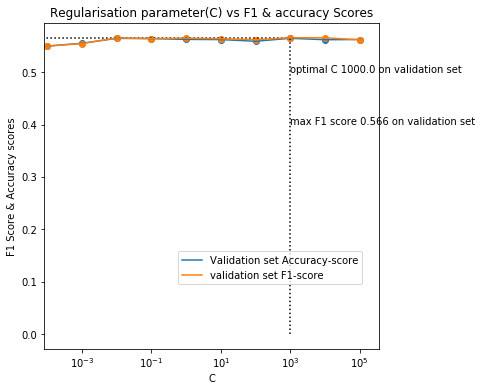

1000.0 0.5662796589632306


In [13]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score & Accuracy scores')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [15]:
lr_corr = LogisticRegression(max_iter = 200,C=c_value) 
lr_corr.fit(X_traindata,y_traindata)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

AUC: 0.52


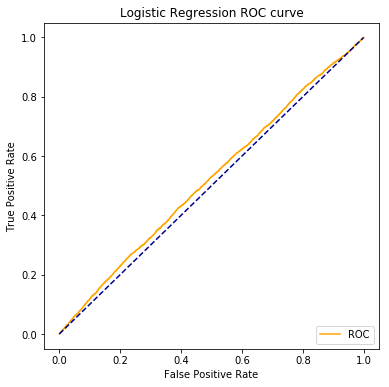

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logis_ytest_proba = lr_corr.predict_proba(X_testdata)
logis_ytest_proba = logis_ytest_proba[:,1]
auc_log = roc_auc_score(y_testdata, logis_ytest_proba)
print('AUC: %.2f' % auc_log)
fpr, tpr, thresholds = roc_curve(y_testdata, logis_ytest_proba)
plot_roc_curve(fpr, tpr)

In [26]:
y_predicted = lr_corr.predict(X_testdata)
y_all_models = y_predicted.copy()
#accuracy score
logis_corr_perf = {}
logis_corr_perf['Accuracy'] = accuracy_score(y_testdata,y_predicted)
logis_corr_perf['Precision'] = precision_score(y_testdata,y_predicted)
logis_corr_perf['Recall'] = recall_score(y_testdata,y_predicted)
logis_corr_perf['F1_score'] = f1_score(y_testdata,y_predicted)
print(confusion_matrix(y_testdata,y_predicted))

[[45204 36932]
 [ 2276  2114]]


In [27]:
print(logis_corr_perf)

{'Accuracy': 0.5468645262695606, 'Precision': 0.05414126927214055, 'Recall': 0.4815489749430524, 'F1_score': 0.09733861313196426}


In [28]:
!pip install xgboost
import re
from xgboost import XGBClassifier

In [31]:
split = 0
#skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True) #stratified fold for class balancing 10 spilts
np_arrayf1val = []
np_arrayf1train = []
np_arrayf2val = []
xgboostdata = []
var = 1
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
#xgboost expects '[', ']', '<' these characters not be there in the column names
for col in bristol_changeddata_corr.columns:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        inter = regex.sub("_", col)
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
    else:
        inter = col
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
temp_bristol_changeddata = bristol_changeddata_corr.copy()
temp_bristol_changeddata.columns = xgboostdata
X_traindata = temp_bristol_changeddata.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata = temp_bristol_changeddata['Target_B']

xgboostdata = []
var = 1
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
for col in X_testdata.columns:
    if any(x in str(col) for x in set(('[', ']', '<'))):
        inter = regex.sub("_", col)
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
    else:
        inter = col
        if inter not in xgboostdata:
            xgboostdata.append(inter)
        else:
            xgboostdata.append(str(inter)+str(var))
            var+=1
temp_bristol_changeddata = X_testdata.copy()
temp_bristol_changeddata.columns = xgboostdata
X_testdata = temp_bristol_changeddata
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
#xgboostdata = [print(col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in bristol_changeddata.columns]

"""for train_index, test_index in skf.split(X_traindata, y_traindata):
    xg = XGBClassifier() 
    X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]
    y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    y_skfpredict1 = xg.predict(X_train)
    test_predictions = [round(value) for value in y_skfpredict]
    train_predictions = [round(value) for value in y_skfpredict1]
    np_arrayf2val.append(f1_score(y_test,test_predictions,average='macro'))#f1 score
    np_arrayf1val.append(accuracy_score(y_test,test_predictions,normalize=True))#accuracy
    np_arrayf1train.append(accuracy_score(y_train,train_predictions,normalize=True))
    split += 1
print("Mean f1 score:-"+str(np.array(np_arrayf1val).mean()))
print("Mean accuracy score:-"+str(np.array(np_arrayf2val).mean()))"""

'for train_index, test_index in skf.split(X_traindata, y_traindata):\n    xg = XGBClassifier() \n    X_train, X_test = X_traindata.iloc[train_index], X_traindata.iloc[test_index]\n    y_train, y_test = y_traindata.iloc[train_index], y_traindata.iloc[test_index]\n    xg.fit(X_train,y_train)\n    y_skfpredict = xg.predict(X_test)\n    y_skfpredict1 = xg.predict(X_train)\n    test_predictions = [round(value) for value in y_skfpredict]\n    train_predictions = [round(value) for value in y_skfpredict1]\n    np_arrayf2val.append(f1_score(y_test,test_predictions,average=\'macro\'))#f1 score\n    np_arrayf1val.append(accuracy_score(y_test,test_predictions,normalize=True))#accuracy\n    np_arrayf1train.append(accuracy_score(y_train,train_predictions,normalize=True))\n    split += 1\nprint("Mean f1 score:-"+str(np.array(np_arrayf1val).mean()))\nprint("Mean accuracy score:-"+str(np.array(np_arrayf2val).mean()))'

In [32]:
et = [0.1,0.2,0.3]
xg_f1 = []
xg_acc = []
for rate in et:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    xg = XGBClassifier(eta=rate,max_depth=3,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_et = et[xg_f1.index(max(xg_f1))]   #returns optimal learning rate
print("xgb classifier with maximum f1 value and learning rate")
print(max(xg_f1),max_et)

xgb classifier with maximum f1 value and learning rate
0.6779035520386075 0.3


In [44]:
#with only learning rate 0.3
xg = XGBClassifier(eta=max_et,max_depth=3,objective='binary:logistic',n_jobs=1)
xg.fit(X_traindata,y_traindata)

AUC: 0.51


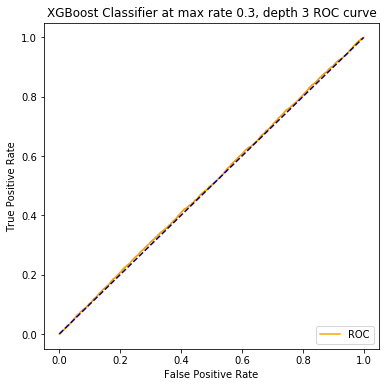

In [38]:
xg_ytest_proba = xg.predict_proba(X_testdata)
xg_ytest_proba = xg_ytest_proba[:,1]
auc_xg = roc_auc_score(y_testdata, xg_ytest_proba)
print('AUC: %.2f' % auc_xg)
fpr, tpr, thresholds = roc_curve(y_testdata, xg_ytest_proba)
plot_roc_curve(fpr, tpr,"XGBoost Classifier at max rate "+str(max_et)+", depth "+str(3) )

In [39]:
y_skfpredict = xg.predict(X_testdata)
test_predictions = [round(value) for value in y_skfpredict]  # for xgboost predicted values should be round off to nearest value for accuracy and other findings

In [40]:
y_all_models += test_predictions

In [41]:
xg_corr_perf = {}
xg_corr_perf['Accuracy'] = accuracy_score(y_testdata,test_predictions)
xg_corr_perf['Precision'] = precision_score(y_testdata,test_predictions)
xg_corr_perf['Recall'] = recall_score(y_testdata,test_predictions)
xg_corr_perf['F1_score'] = f1_score(y_testdata,test_predictions)
print(confusion_matrix(y_testdata,y_predicted))
print(xg_corr_perf)

[[45204 36932]
 [ 2276  2114]]
{'Accuracy': 0.5999237223493517, 'Precision': 0.051727717633100995, 'Recall': 0.39726651480637815, 'F1_score': 0.09153654376066135}


In [48]:
#finding optimal depth at optimal rate
depth = [2,3,5,8,10,12]
xg_f1 = []
xg_acc = []
for val in depth:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    xg = XGBClassifier(eta=max_et,max_depth=val,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_depth = depth[xg_f1.index(max(xg_f1))]
print("Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is")
print(max(xg_f1),xg_f1.index(max(xg_f1)))

Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is
0.9988764251901788 5


In [42]:
xg = XGBClassifier(eta=max_et,max_depth=2,objective='binary:logistic',n_jobs=1)
xg.fit(X_traindata,y_traindata)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=1, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

AUC: 0.51


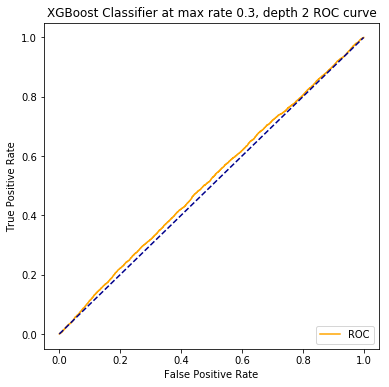

In [43]:
xg_ytest_proba = xg.predict_proba(X_testdata)
xg_ytest_proba = xg_ytest_proba[:,1]
auc_xg = roc_auc_score(y_testdata, xg_ytest_proba)
print('AUC: %.2f' % auc_xg)
fpr, tpr, thresholds = roc_curve(y_testdata, xg_ytest_proba)
plot_roc_curve(fpr, tpr,"XGBoost Classifier at max rate "+str(max_et)+", depth "+str(2) )

In [44]:
y_skfpredict = xg.predict(X_testdata)
test_predictions = [round(value) for value in y_skfpredict]  # for xgboost predicted values should be round off to nearest value for accuracy and other findings

In [45]:
xg_corr_perf1 = {}
xg_corr_perf1['Accuracy'] = accuracy_score(y_testdata,test_predictions)
xg_corr_perf1['Precision'] = precision_score(y_testdata,test_predictions)
xg_corr_perf1['Recall'] = recall_score(y_testdata,test_predictions)
xg_corr_perf1['F1_score'] = f1_score(y_testdata,test_predictions)
print(confusion_matrix(y_testdata,y_predicted))
print(xg_corr_perf1)

[[45204 36932]
 [ 2276  2114]]
{'Accuracy': 0.5599819707371195, 'Precision': 0.05328771120129439, 'Recall': 0.45763097949886106, 'F1_score': 0.09545983701979044}


In [46]:
X_traindata1 = bristol.drop(['Target_B','Target_D'],axis=1)
y_traindata1 = bristol['Target_B']
X_testdata1 = bristol_test.drop(['Target_B','Target_D'],axis=1)
y_testdata1 = bristol_test['Target_B']

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
np_arrayaccval = []
np_arrayf1val = []
depth_vals = [2, 4, 8, 16, 32, 64]
for depth in range(len(depth_vals)):
    X_train, X_test, y_train, y_test = train_test_split(X_traindata, y_traindata, test_size=0.3)
    lr = RandomForestClassifier(n_estimators = 500, max_depth = depth_vals[depth], n_jobs = -1) 
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[depth],np_arrayaccval[depth])
max_depth = depth_vals[np_arrayf1val.index(max(np_arrayf1val))]
print(max(np_arrayf1val),np_arrayf1val.index(max(np_arrayf1val)))

0.4132834104201845 0.5588127047219462
0.6396126091910369 0.6507673622612344
0.899281236787441 0.899175591623422
1.0 1.0
1.0 1.0
1.0 1.0
1.0 3


In [48]:
random_corr = RandomForestClassifier(n_estimators = 500, max_depth = 2, n_jobs = -1) 
random_corr.fit(X_traindata,y_traindata)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

AUC: 0.53


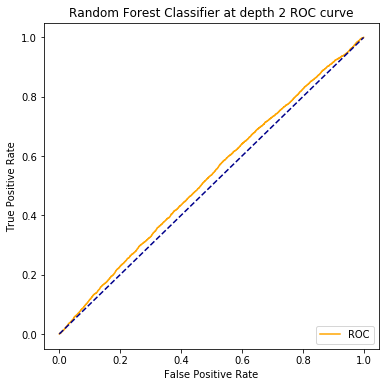

In [99]:
random_corr_proba = random_corr.predict_proba(X_testdata)
random_corr_proba = random_corr_proba[:,1]
auc_rand = roc_auc_score(y_testdata, random_corr_proba)
print('AUC: %.2f' % auc_rand)
fpr, tpr, thresholds = roc_curve(y_testdata, random_corr_proba)
plot_roc_curve(fpr, tpr,"Random Forest Classifier at depth 2" )

In [52]:
y_predict_random = random_corr.predict(X_testdata)
y_all_models += y_predict_random

In [53]:
rand_corr_perf = {}
rand_corr_perf['Accuracy'] = accuracy_score(y_testdata,y_predict_random)
rand_corr_perf['Precision'] = precision_score(y_testdata,y_predict_random)
rand_corr_perf['Recall'] = recall_score(y_testdata,y_predict_random)
rand_corr_perf['F1_score'] = f1_score(y_testdata,y_predict_random)
print(confusion_matrix(y_testdata,y_predict_random))
print(rand_corr_perf)

[[44577 37559]
 [ 2234  2156]]
{'Accuracy': 0.540103552689365, 'Precision': 0.05428679340299635, 'Recall': 0.4911161731207289, 'F1_score': 0.09776669311869404}


In [36]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 4, n_jobs = -1) 
lr.fit(X_traindata,y_traindata)
y_predict = lr.predict(X_testdata)
print(accuracy_score(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
print(precision_score(y_testdata,y_predict))
print(recall_score(y_testdata,y_predict))
print(confusion_matrix(y_testdata,y_predict))
print(f1_score(y_testdata,y_predict))
pd.crosstab(y_testdata, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5363012273767422
0.09373870617997832
0.05202848402788225
0.47266514806378135
[[44329 37807]
 [ 2315  2075]]
0.09373870617997832


preds,0,1
actual,,
0,44329,37807
1,2315,2075


In [54]:
for col in X_testdata1:
    if len(X_testdata1.loc[X_testdata1[col].isna()]) != 0:
        if str(X_testdata1[col].dtypes) == 'int64' or str(X_testdata1[col].dtypes) == 'float64':
            X_testdata1[col].fillna(X_testdata1[col].mean(skipna=True),inplace=True)
        elif str(X_testdata1[col].dtypes) == 'object':
            X_testdata1[col].fillna(X_testdata1[col].mode().iloc[0],inplace=True)
for col in X_traindata1:
    if len(X_traindata1.loc[X_traindata1[col].isna()]) != 0:
        if str(X_traindata1[col].dtypes) == 'int64' or str(X_traindata1[col].dtypes) == 'float64':
            X_traindata1[col].fillna(X_traindata1[col].mean(skipna=True),inplace=True)
        elif str(X_traindata1[col].dtypes) == 'object':
            X_traindata1[col].fillna(X_traindata1[col].mode().iloc[0],inplace=True)

In [55]:
print(X_traindata1.shape)
print(X_testdata1.shape)
print(y_testdata1.shape)

(95412, 1385)
(86526, 1385)
(86526,)


In [59]:
#base line model random tree forest without important feture selection
from sklearn.dummy import DummyClassifier
baseline = DummyClassifier(strategy="most_frequent") 
baseline.fit(X_traindata1,y_traindata1)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

AUC: 0.53


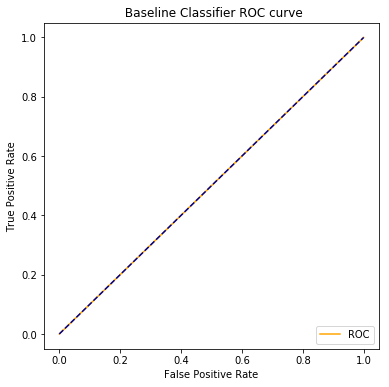

In [64]:
baseline_proba = baseline.predict_proba(X_testdata1)
baseline_proba = baseline_proba[:,1]
auc_baseline = roc_auc_score(y_testdata1, baseline_proba)
print('AUC: %.2f' % auc_rand)
fpr, tpr, thresholds = roc_curve(y_testdata1, baseline_proba)
plot_roc_curve(fpr, tpr," Baseline Classifier")

In [62]:
y_predict = baseline.predict(X_testdata1)

In [63]:
baseline_corr_perf = {}
baseline_corr_perf['Accuracy'] = accuracy_score(y_testdata,y_predict)
baseline_corr_perf['Precision'] = precision_score(y_testdata,y_predict)
baseline_corr_perf['Recall'] = recall_score(y_testdata,y_predict)
baseline_corr_perf['F1_score'] = f1_score(y_testdata,y_predict)
print(confusion_matrix(y_testdata,y_predict))
print(baseline_corr_perf)

[[82136     0]
 [ 4390     0]]
{'Accuracy': 0.9492638050990454, 'Precision': 0.0, 'Recall': 0.0, 'F1_score': 0.0}


In [65]:
#ensemble model for correlation important features
y_ensemble_predict = np.array([0] * len(y_all_models))
y_ensemble_predict[y_all_models > 1] = 1
ensemble_corr_perf = {}
ensemble_corr_perf['Accuracy'] = accuracy_score(y_testdata,y_ensemble_predict)
ensemble_corr_perf['Precision'] = precision_score(y_testdata,y_ensemble_predict)
ensemble_corr_perf['Recall'] = recall_score(y_testdata,y_ensemble_predict)
ensemble_corr_perf['F1_score'] = f1_score(y_testdata,y_ensemble_predict)
print(confusion_matrix(y_testdata,y_ensemble_predict))
print(ensemble_corr_perf)

[[47526 34610]
 [ 2414  1976]]
{'Accuracy': 0.5721054943022906, 'Precision': 0.0540097304980047, 'Recall': 0.45011389521640094, 'F1_score': 0.09644670050761422}


AUC: 0.51


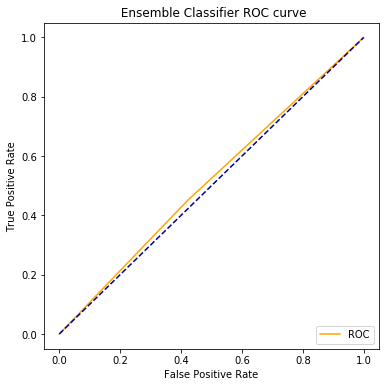

In [109]:
auc_ensemble = roc_auc_score(y_testdata, y_ensemble_predict)
print('AUC: %.2f' % auc_ensemble)
fpr, tpr, thresholds = roc_curve(y_testdata, y_ensemble_predict)
plot_roc_curve(fpr, tpr," Ensemble Classifier")

In [68]:
all_models = {'XGBOOST at learning rate 0.3 and depth 3': xg_corr_perf,
              'XGBOOST at learning rate 0.3 and depth 2': xg_corr_perf1,
              'Ensemble Model': ensemble_corr_perf,
                  'Logistic Regression Model': logis_corr_perf,
                  'Random Forest Model': rand_corr_perf,}

all_models_metrics = pd.DataFrame([[col1, col2, col3 * 100] for col1, d in all_models.items() for col2, col3 in d.items()], index = None,
        columns = ['Models using correlation feature selection', 'Performance Evaluation', 'Score'])

print(all_models_metrics)
print(all_models_metrics.to_latex())

   Models using correlation feature selection Performance Evaluation  \
0    XGBOOST at learning rate 0.3 and depth 3               Accuracy   
1    XGBOOST at learning rate 0.3 and depth 3              Precision   
2    XGBOOST at learning rate 0.3 and depth 3                 Recall   
3    XGBOOST at learning rate 0.3 and depth 3               F1_score   
4    XGBOOST at learning rate 0.3 and depth 2               Accuracy   
5    XGBOOST at learning rate 0.3 and depth 2              Precision   
6    XGBOOST at learning rate 0.3 and depth 2                 Recall   
7    XGBOOST at learning rate 0.3 and depth 2               F1_score   
8                              Ensemble Model               Accuracy   
9                              Ensemble Model              Precision   
10                             Ensemble Model                 Recall   
11                             Ensemble Model               F1_score   
12                  Logistic Regression Model               Accu

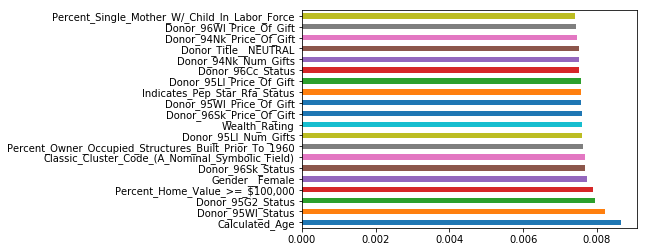

[0.008641430992957512, 0.008229551671751479, 0.00795006962033147, 0.007905176412222228, 0.007719697859757557, 0.007665511207585592, 0.007664781019409143, 0.007621043247478294, 0.0076022121770284974, 0.007593219778170321, 0.007592138812068253, 0.00757945508766206, 0.00756510142153667, 0.007559596822627945, 0.007499005566506303, 0.007498865469695454, 0.007498829279495497, 0.007470077431469382, 0.007420812953557834, 0.007392154660504489]


In [80]:
#another feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_traindata,y_traindata)
dfscores = model.feature_importances_
dfcolumns = pd.DataFrame(X_traindata.columns)
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_traindata.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()
print(list(feat_importances.nlargest(20)))



In [81]:
imporatant_features_select = list(feat_importances.nlargest(20).index)
print(len(imporatant_features_select))

20


In [62]:
imporatant_features_select_15 = list(feat_importances.nlargest(15).index)
print(len(imporatant_features_select_15))

15


In [82]:
X_traindata_feats = X_traindata[imporatant_features_select]
y_traindata_feats = y_traindata
print(X_traindata_feats.shape)
print(y_traindata_feats.shape)
X_testdata_feats = X_testdata[imporatant_features_select]
y_testdata_feats = y_testdata

(181138, 20)
(181138,)


In [64]:
X_traindata_feats_100 = X_traindata[imporatant_features_select_15]
y_traindata_feats_100 = y_traindata
print(X_traindata_feats_100.shape)
print(y_traindata_feats_100.shape)
X_testdata_feats_100 = X_testdata[imporatant_features_select_15]
y_testdata_feats_100 = y_testdata

(181138, 15)
(181138,)


In [50]:
#bristol_test_removedD = bristol_test[imporatant_features_select]
#print(bristol_test_removedD.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
#X_testdata_feats = bristol_test_removedD.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
#y_testdata_feats = bristol_test_removedD['Target_B']

(86526, 21)


In [83]:
#logistic regression using penalities. finding optimal c parameter
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.5224019980453903 0.5143866622501932
0.5206789175913337 0.5173236170917522
0.5145418810591171 0.5145633211880314
0.5240377251143351 0.5196864303853374
0.5203372475545195 0.5138125207022193
0.5256117951056392 0.5175665231312797
0.5123222643685811 0.5145191564535718
0.5223297154462667 0.5169923815833057
0.5205979336117829 0.5184277354532406
0.5367500908333155 0.5213646902947996


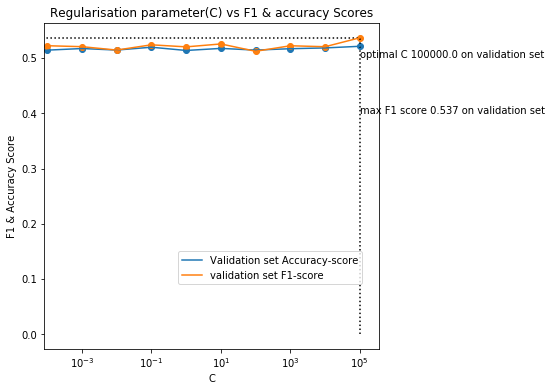

100000.0 0.5367500908333155


In [84]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 & Accuracy Score')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [55]:
#for col in X_testdata_feats:
 #   if len(X_testdata_feats.loc[X_testdata_feats[col].isna()]) != 0:
  #      X_testdata_feats[col].fillna(X_testdata_feats[col].mode().iloc[0],inplace=True)
#print(X_traindata_feats.shape)

(181138, 20)


In [85]:
logis_impfeats = LogisticRegression(max_iter = 200,C=c_value) 
logis_impfeats.fit(X_traindata_feats,y_traindata_feats)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=200,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

AUC: 0.52


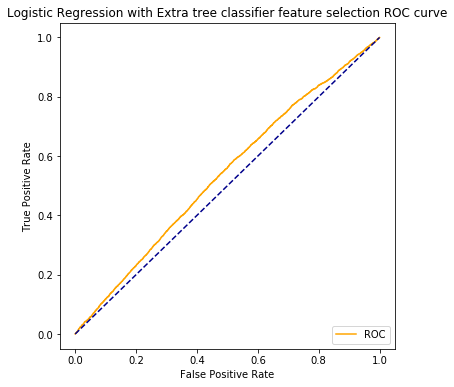

In [112]:
logis_impfeats_proba = logis_impfeats.predict_proba(X_testdata_feats)
logis_impfeats_proba = logis_impfeats_proba[:,1]
auc_log_impfea = roc_auc_score(y_testdata_feats, logis_impfeats_proba)
print('AUC: %.2f' % auc_log)
fpr, tpr, thresholds = roc_curve(y_testdata_feats, logis_impfeats_proba)
plot_roc_curve(fpr, tpr,"Logistic Regression with Extra tree classifier feature selection")

In [87]:
y_predicted = logis_impfeats.predict(X_testdata_feats)
logis_imp_perf = {}
logis_imp_perf['Accuracy'] = accuracy_score(y_testdata_feats,y_predicted)
logis_imp_perf['Precision'] = precision_score(y_testdata_feats,y_predicted)
logis_imp_perf['Recall'] = recall_score(y_testdata_feats,y_predicted)
logis_imp_perf['F1_score'] = f1_score(y_testdata_feats,y_predicted)
print(confusion_matrix(y_testdata_feats,y_predicted))
print(logis_imp_perf)

[[38508 43628]
 [ 1784  2606]]
{'Accuracy': 0.47516353466010214, 'Precision': 0.056365445343253884, 'Recall': 0.593621867881549, 'F1_score': 0.1029551201011378}


In [88]:
y_allmodels_imp = y_predicted.copy()

In [89]:
et = [0.1,0.2,0.3]
xg_f1 = []
xg_acc = []
for rate in et:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.3)
    xg = XGBClassifier(eta=rate,max_depth=3,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_et = et[xg_f1.index(max(xg_f1))]
print("xgb classifier with maximum f1 value and learning rate")
print(max(xg_f1),max_et)

xgb classifier with maximum f1 value and learning rate
0.6172411275010954 0.3


In [66]:
#finding optimal depth at optimal rate
depth = [2,3,5,8,10,12]
xg_f1 = []
xg_acc = []
for val in depth:
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.3)
    xg = XGBClassifier(eta=max_et,max_depth=val,objective='binary:logistic',n_jobs=1)
    xg.fit(X_train,y_train)
    y_skfpredict = xg.predict(X_test)
    test_predictions = [round(value) for value in y_skfpredict]
    xg_f1.append(f1_score(y_test,test_predictions))
    xg_acc.append(accuracy_score(y_test,test_predictions))
max_depth = depth[xg_f1.index(max(xg_f1))]
print("Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is")
print(max(xg_f1),max_depth)

Xb classifier optimal f1 score for validation and optimal depth at learning rate 0.3 is
0.9983726160653879 12


In [90]:
#not using above depth 12. using max depth 2 below
xg_imp = XGBClassifier(eta=max_et,max_depth=2,objective='binary:logistic',n_jobs=1)
xg_imp.fit(X_traindata_feats,y_traindata_feats)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=1, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

AUC: 0.50


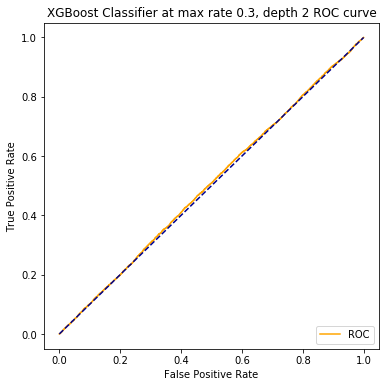

In [113]:
xg_imp_proba = xg_imp.predict_proba(X_testdata_feats)
xg_imp_proba = xg_imp_proba[:,1]
auc_xg_imp = roc_auc_score(y_testdata_feats, xg_imp_proba)
print('AUC: %.2f' % auc_xg_imp)
fpr, tpr, thresholds = roc_curve(y_testdata_feats, xg_imp_proba)
plot_roc_curve(fpr, tpr,"XGBoost Classifier at max rate "+str(max_et)+", depth "+str(2) )

In [95]:
y_xg_img = xg_imp.predict(X_testdata_feats)
y_xg_test_predictions = [round(value) for value in y_xg_img]

In [96]:
xg_imp_perf = {}
xg_imp_perf['Accuracy'] = accuracy_score(y_testdata_feats,y_xg_test_predictions)
xg_imp_perf['Precision'] = precision_score(y_testdata_feats,y_xg_test_predictions)
xg_imp_perf['Recall'] = recall_score(y_testdata_feats,y_xg_test_predictions)
xg_imp_perf['F1_score'] = f1_score(y_testdata_feats,y_xg_test_predictions)
print(confusion_matrix(y_testdata_feats,y_predicted))
print(xg_imp_perf)

[[38508 43628]
 [ 1784  2606]]
{'Accuracy': 0.6048702124216998, 'Precision': 0.05190821328681844, 'Recall': 0.3931662870159453, 'F1_score': 0.09170850933822162}


In [97]:
y_allmodels_imp += y_xg_test_predictions

In [77]:
np_arrayaccval = []
np_arrayf1val = []
depth_vals = [2, 4, 8, 16, 32, 64]
for depth in range(len(depth_vals)):
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats, y_traindata_feats, test_size=0.25)
    lr = RandomForestClassifier(n_estimators = 500, max_depth = depth_vals[depth], n_jobs = -1) 
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[depth],np_arrayaccval[depth])
max_depth = depth_vals[np_arrayf1val.index(max(np_arrayf1val))]
print(max(np_arrayf1val),np_arrayf1val.index(max(np_arrayf1val)))

0.5043522081729889 0.5221817378823009
0.5529782554474751 0.564646130065143
0.8005933824952164 0.7951860439439108
0.9999342782658226 0.9999337528983107


KeyboardInterrupt: 

In [98]:
random_forest_imp = RandomForestClassifier(n_estimators = 500, max_depth = 2, n_jobs = -1) 
random_forest_imp.fit(X_traindata_feats,y_traindata_feats)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

AUC: 0.49


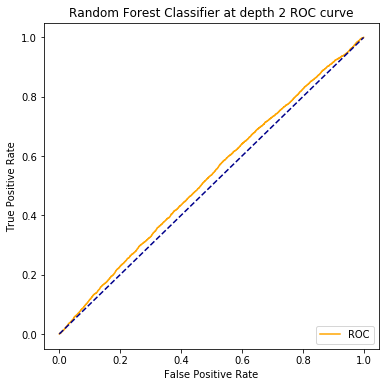

In [111]:
random_imp_proba = random_forest_imp.predict_proba(X_testdata_feats)
random_imp_proba = random_imp_proba[:,1]
auc_rand_imp = roc_auc_score(y_testdata_feats, random_imp_proba)
print('AUC: %.2f' % auc_rand_imp)
fpr, tpr, thresholds = roc_curve(y_testdata_feats, random_corr_proba)
plot_roc_curve(fpr, tpr,"Random Forest Classifier at depth 2")

In [101]:
y_random_imp = random_forest_imp.predict(X_testdata_feats)
y_allmodels_imp += y_random_imp

In [102]:
rand_imp_perf = {}
rand_imp_perf['Accuracy'] = accuracy_score(y_testdata_feats,y_random_imp)
rand_imp_perf['Precision'] = precision_score(y_testdata_feats,y_random_imp)
rand_imp_perf['Recall'] = recall_score(y_testdata_feats,y_random_imp)
rand_imp_perf['F1_score'] = f1_score(y_testdata_feats,y_random_imp)
print(confusion_matrix(y_testdata_feats,y_random_imp))
print(rand_imp_perf)

[[42139 39997]
 [ 2297  2093]]
{'Accuracy': 0.5111989459815547, 'Precision': 0.04972677595628415, 'Recall': 0.47676537585421414, 'F1_score': 0.09006024096385543}


In [107]:
#ensemble model for 20 features selection
y_ensemble_imp_predict = np.array([0] * len(y_allmodels_imp))
y_ensemble_imp_predict[y_allmodels_imp > 1] = 1
ensemble_imp_perf = {}
ensemble_imp_perf['Accuracy'] = accuracy_score(y_testdata_feats,y_ensemble_imp_predict)
ensemble_imp_perf['Precision'] = precision_score(y_testdata_feats,y_ensemble_imp_predict)
ensemble_imp_perf['Recall'] = recall_score(y_testdata_feats,y_ensemble_imp_predict)
ensemble_imp_perf['F1_score'] = f1_score(y_testdata_feats,y_ensemble_imp_predict)
print(confusion_matrix(y_testdata_feats,y_ensemble_imp_predict))
print(ensemble_imp_perf)

[[44362 37774]
 [ 2311  2079]]
{'Accuracy': 0.5367288445091649, 'Precision': 0.05216671266905879, 'Recall': 0.4735763097949886, 'F1_score': 0.09398096874081777}


AUC: 0.51


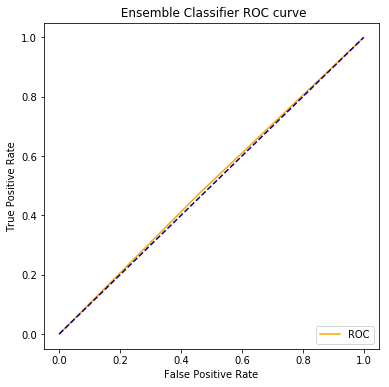

In [110]:
auc_ensemble_feats = roc_auc_score(y_testdata_feats, y_ensemble_imp_predict)
print('AUC: %.2f' % auc_ensemble_feats)
fpr, tpr, thresholds = roc_curve(y_testdata_feats, y_ensemble_imp_predict)
plot_roc_curve(fpr, tpr," Ensemble Classifier")

In [108]:
all_models = {'Random Forest Model': rand_imp_perf,
    'XGBOOST at learning rate 0.3 and depth 3': xg_imp_perf,
              'Ensemble Model': ensemble_imp_perf,
                  'Logistic Regression Model': logis_imp_perf,
                  }

all_models_metrics = pd.DataFrame([[col1, col2, col3 * 100] for col1, d in all_models.items() for col2, col3 in d.items()], index = None,
        columns = ['Models using tree based feature selection', 'Performance Evaluation', 'Score'])

print(all_models_metrics)
print(all_models_metrics.to_latex())

   Models using tree based feature selection Performance Evaluation      Score
0                        Random Forest Model               Accuracy  51.119895
1                        Random Forest Model              Precision   4.972678
2                        Random Forest Model                 Recall  47.676538
3                        Random Forest Model               F1_score   9.006024
4   XGBOOST at learning rate 0.3 and depth 3               Accuracy  60.487021
5   XGBOOST at learning rate 0.3 and depth 3              Precision   5.190821
6   XGBOOST at learning rate 0.3 and depth 3                 Recall  39.316629
7   XGBOOST at learning rate 0.3 and depth 3               F1_score   9.170851
8                             Ensemble Model               Accuracy  53.672884
9                             Ensemble Model              Precision   5.216671
10                            Ensemble Model                 Recall  47.357631
11                            Ensemble Model        

In [79]:
lr = RandomForestClassifier(n_estimators = 500, max_depth = 4, n_jobs = -1) 
lr.fit(X_traindata_feats,y_traindata_feats)
y_predict = lr.predict(X_testdata_feats)
print(accuracy_score(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
print(precision_score(y_testdata_feats,y_predict))
print(recall_score(y_testdata_feats,y_predict))
print(confusion_matrix(y_testdata_feats,y_predict))
print(f1_score(y_testdata_feats,y_predict))
pd.crosstab(y_testdata_feats, y_predict, rownames = ['actual'], colnames = ['preds'])

0.5675635069227747
0.09927541465058617
0.05550321660251407
0.4697038724373576
[[47047 35089]
 [ 2328  2062]]
0.09927541465058617


preds,0,1
actual,,
0,47047,35089
1,2328,2062


In [75]:
#logistic regression using penalities for 15 first features
cspace = np.logspace(-4,5,num=10) #from 10^-4 to 10^5 and 19 values in between
np_arrayaccval = []
np_arrayf1val = []
for c in range(len(cspace)):
    lr = LogisticRegression(max_iter = 200,C=cspace[c]) 
    X_train, X_test, y_train, y_test = train_test_split(X_traindata_feats_100, y_traindata_feats_100, test_size=0.25)
    lr.fit(X_train,y_train)
    y_skfpredict = lr.predict(X_test)
    y_skfpredict1 = lr.predict(X_train)
    #np_arrayf1val[split,c] = f1_score(y_test,y_skfpredict,average='macro')#f1 score
    np_arrayaccval.append(accuracy_score(y_test,y_skfpredict))#accuracy
    np_arrayf1val.append(f1_score(y_test,y_skfpredict))
    print(np_arrayf1val[c],np_arrayaccval[c])

0.496796830786644 0.5091310588495087
0.5117680953858428 0.5135254499282323
0.5119236883942767 0.5118913547532296
0.5267450435989762 0.5182069117809429
0.5034282759705955 0.512222590261676
0.5082328825115305 0.5126200728718119
0.504567027849915 0.5113172132052556
0.5067840937031987 0.5127525670751905
0.5007874724384647 0.5100364359059291
0.4946139018029255 0.5078944462846418


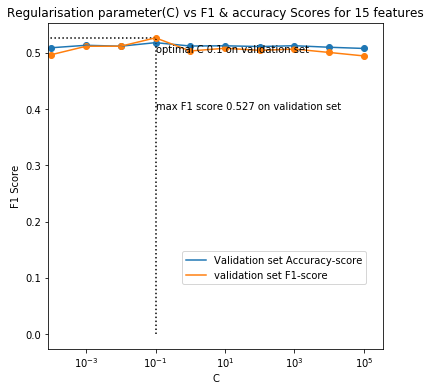

0.1 0.5267450435989762


In [76]:
#graph representaion
f1train_mean = np_arrayaccval #mean for each reguralisation parameter
f1val_mean = np_arrayf1val
fig = plt.figure(figsize=(6,6))
ax = plt.gca()
plt.xscale('log')
plt.plot(cspace,f1train_mean,label='Validation set Accuracy-score')
plt.scatter(cspace,f1train_mean)
plt.plot(cspace,f1val_mean,label='validation set F1-score')
plt.scatter(cspace,f1val_mean)
plt.legend(bbox_to_anchor=(0.4, 0.3), loc='upper left', borderaxespad=0.)
plt.xlim(-5.5,)
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('Regularisation parameter(C) vs F1 & accuracy Scores for 15 features')
max_mean = max(list(f1val_mean))
index = list(f1val_mean).index(max_mean)
c_value = list(cspace)[index]
plt.vlines(c_value,0,max_mean,linestyle=":")
plt.hlines(max_mean,0,c_value,linestyle=":")
plt.annotate('optimal C {} on validation set'.format(c_value),xy=(c_value,0.5))
plt.annotate('max F1 score {:.3f} on validation set'.format(max_mean),xy=(c_value,0.4))
plt.show()
print(c_value,max_mean)
#print(f1val_mean)

In [77]:
for col in X_testdata_feats_100:
    if len(X_testdata_feats_100.loc[X_testdata_feats_100[col].isna()]) != 0:
        if str(X_testdata_feats_100[col].dtypes) == 'int64' or str(X_testdata_feats_100[col].dtypes) == 'float64':
            X_testdata_feats_100[col].fillna(X_testdata_feats_100[col].mean(skipna=True),inplace=True)

In [78]:
lr1 = LogisticRegression(max_iter = 200,C=c_value) 
lr1.fit(X_traindata_feats_100,y_traindata_feats_100)
y_predicted = lr1.predict(X_testdata_feats_100)

In [79]:
print("Accuracy score of logistic regression with 15 important features")
print(accuracy_score(y_testdata_feats_100,y_predicted))
print("Precision score of logistic regression with 15 important features")
print(precision_score(y_testdata_feats_100,y_predicted))
print("Recall score of logistic regression with 15 important features")
print(recall_score(y_testdata_feats_100,y_predicted))
print("f1 score of logistic regression with 15 important features")
print(f1_score(y_testdata_feats_100,y_predicted))
print("confusion matrix logistic regression with 15 important features")
print(confusion_matrix(y_testdata_feats_100,y_predicted))

Accuracy score of logistic regression with 15 important features
0.5424727827473823
Precision score of logistic regression with 15 important features
0.0543428716130666
Recall score of logistic regression with 15 important features
0.4888382687927107
f1 score of logistic regression with 15 important features
0.09781221513217868
confusion matrix logistic regression with 15 important features
[[44792 37344]
 [ 2244  2146]]


In [18]:
#feature selection for prediction
unwanted_cols_regress = []
bristol_removedB = bristol.drop('Target_B',axis=1)
bristol_dat = bristol_removedB.var()
unwanted_cols_regress.extend(bristol_dat.index[bristol_dat < 0.001])
#remove columns which are mostly sparse i.e columns that contain less than 1 % of total data
unwanted_cols_regress.extend(bristol.columns[bristol.count() < int(bristol.shape[0] * 0.01)])
bristol_preprocessed_regress = bristol.drop(unwanted_cols_regress,axis=1)
#bristol_test_preprocessed = bristol.drop(unwanted_cols,axis=1)
#imputation of mean values for int and float and for object mode values
for col in bristol_preprocessed_regress:
    if len(bristol_preprocessed_regress.loc[bristol_preprocessed_regress[col].isna()]) != 0:
        if str(bristol_preprocessed_regress[col].dtypes) == 'int64' or str(bristol_preprocessed_regress[col].dtypes) == 'float64':
            bristol_preprocessed_regress[col].fillna(bristol_preprocessed_regress[col].mean(skipna=True),inplace=True)
        elif str(bristol_preprocessed_regress[col].dtypes) == 'object':
            bristol_preprocessed_regress[col].fillna(bristol_preprocessed_regress[col].mode().iloc[0],inplace=True)
print(unwanted_cols_regress)

['Donor_97Nk_Status', 'Donor_Status_1997', 'Donor_Title__ARMY', 'Donor_Title__GOVER', 'Donor_Title__RELIGIOUS', 'State__0', 'State__Armed_Forces_Africa', 'State__Armed_Forces_Americas', 'State__Armed_Forces_Pacific', 'State__Connecticut', 'State__Delaware', 'State__District_of_Columbia', 'State__Maine', 'State__Maryland', 'State__Massachusetts', 'State__New_Hampshire', 'State__New_Jersey', 'State__New_York', 'State__Ohio', 'State__Pennsylvania', 'State__Rhode_Island', 'State__Vermont', 'State__Virginia', 'State__West_Virginia', 'DOB_Year__1900', 'Recency Of Giving__DormantDonor', 'Recency Of Giving__InactiveDonor', 'Recency Of Giving__LapsedDonor', 'Frequency Of Giving__2to4_gifts', 'Frequency Of Giving__5+_gifts', 'Amount Of Giving__LessDonor', 'Amount Of Giving__MajorDoner_5+', 'Amount Of Giving__TopDonor_1+', 'EPVA/PVA_Northeastern_US__EPVA_StateVA_State_Northeastern_US', 'Age_Flag__I', 'Children_0-3__Child_BothGenders', 'Date_The_97Nk_Promotion_Was_Mailed__9704', 'Date_The_97Nk_Pro

In [19]:
print(len(unwanted_cols_regress))

465


In [20]:
#feature selection based on corelation i.e higher correlated variables shows most impact on the data by balancing the dataset.
#so postive and correlated values which are higher than 0.01 are considered
#to do that categorical values are changed to ordinal
bristol_preprocessed_regress.apply(np.random.permutation)        #shuffling data to ensure data has no predefined order
positive_labels = bristol_preprocessed_regress['Target_D'] >0  #postive labels
positive_examples = bristol_preprocessed_regress[positive_labels] #positive rows
negative_examples = bristol_preprocessed_regress[bristol_preprocessed_regress['Target_D'] == 0][:sum(positive_labels)] #equal number of negative rows for balancing
subset_data = positive_examples.append(negative_examples,ignore_index=True)
#changed_data = pd.get_dummies(subset_data) #changing categorical values
changed_data_corr_regress = subset_data.corr()['Target_D'].copy() #coorelation
#print(changed_data.describe())

In [21]:
positive_correlation = changed_data_corr_regress.loc[changed_data_corr_regress >= 0.01].index
negative_correlation = changed_data_corr_regress.loc[changed_data_corr_regress <=-0.01].index
print(pd.DataFrame(changed_data_corr_regress).sort_values('Target_D'))
imporatant_features_regress = list(set(positive_correlation.append(negative_correlation)))
print(len(imporatant_features_regress))

                                                  Target_D
Percent_Scottish_Ancestry                        -0.027719
Calculated_Age                                   -0.027431
Culinary_Pubs                                    -0.026099
Date_The_Gift_Was_Received_For_95Nk__9507        -0.024848
Donor_95Gk_Status                                -0.023069
Percent_Children_Age_16-18                       -0.022707
Date_The_96X1_Promotion_Was_Mailed__9510         -0.022657
Donor_96G4_Price_Of_Gift                         -0.022474
Percent_Multi_(2+)_Unit_Structures               -0.022050
Date_Of_Second_Gift__9110                        -0.021869
Percent_Employed_By_Local_Government             -0.021652
State__Oklahoma                                  -0.020620
Date_The_Gift_Was_Received_For_95Cc__9501        -0.020555
Date_Of_First_Gift__9412                         -0.020322
Donor_96Cc_Price_Of_Gift                         -0.019494
Lifetime_Number_Of_Promotions_Received_To_Date   -0.0194

In [22]:
#getting data from important features
bristol_changeddata_regress = bristol_preprocessed_regress[imporatant_features_regress]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
print(bristol_changeddata_regress.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
"""
from sklearn.utils import resample
not_donated = bristol_changeddata_regress[bristol_changeddata_regress.Target_D==0]
donated = bristol_changeddata_regress[bristol_changeddata_regress.Target_D>1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata_regress = pd.concat([not_donated, donated_upsampled])"""

X_traindata_regress = bristol_changeddata_regress.drop('Target_D',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata_regress = bristol_changeddata_regress['Target_D']
print(bristol_changeddata_regress.shape)

(95412, 287)
(95412, 287)


In [23]:
bristol_test_removedB = bristol_test[imporatant_features_regress]
print(bristol_test_removedB.shape)
#print(bristol_changeddata.describe())
#splitting data according to labels and targets
X_testdata_regress = bristol_test_removedB.drop('Target_D',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_testdata_regress = bristol_test_removedB['Target_D']
print(X_testdata_regress.shape)
print(y_testdata_regress.shape)

(86526, 287)
(86526, 286)
(86526,)


In [24]:
y_mean = y_testdata_regress.mean()
#training
#y_train_baseline = np.array([y_mean]*y_train.shape[0])
#print("baseline training rmse error:  "+str(np.sqrt(mean_squared_error(y_train,y_train_baseline))))
#validation
y_val_baseline = np.array([y_mean]*y_testdata_regress.shape[0])
print("baseline test rmse error:  "+str(np.sqrt(mean_squared_error(y_testdata_regress,y_val_baseline))))
sum1 = 0
for val in y_val_baseline:
    sum1 += (val-0.68)
print(sum1)

baseline test rmse error:  4.7102927631500116
9186.459999991763


In [25]:
for col in X_testdata_regress:
    if len(X_testdata_regress.loc[X_testdata_regress[col].isna()]) != 0:
        X_testdata_regress[col].fillna(X_testdata_regress[col].mode().iloc[0],inplace=True)
print(X_testdata_regress.shape)

(86526, 286)


In [26]:
#usinng directly linear regression
lr = LinearRegression()
lr.fit(X_traindata_regress,y_traindata_regress)#important features selected directly related to target d
y_trainpredict = lr.predict(X_traindata_regress)
y_valpredict = lr.predict(X_testdata_regress)
#training rmse error
print("training rmse error:  "+str(np.sqrt(mean_squared_error(y_traindata_regress,y_trainpredict))))
#validation rmse error
print("test rmse error:  "+str(np.sqrt(mean_squared_error(y_testdata_regress,y_valpredict))))

training rmse error:  4.416462376612502
test rmse error:  4.714751449853198


In [122]:
sum_donation = 0
#for val in y_trainpredict:
 #   sum_donation += (val-0.68)
for val in y_valpredict:
    sum_donation += (val-0.68)
print("profit using only linear regression:-")
print(sum_donation)

profit:-
10467.944123816987


In [85]:
#getting data from important features
imporatant_features_regress_upsample= imporatant_features_regress
if "Target_B" not in imporatant_features_regress_upsample:
    imporatant_features_regress_upsample.append("Target_B")
if "Target_D" not in imporatant_features_regress_upsample:
    imporatant_features_regress_upsample.append("Target_D")
bristol_changeddata_regress_upsample = bristol_preprocessed[imporatant_features_regress_upsample]
#bristol_changeddata = pd.get_dummies(bristol_preprocessed)[imporatant_features]
#print(bristol_changeddata.describe())
#splitting data according to labels and targets

#upsampling
from sklearn.utils import resample
not_donated = bristol_changeddata_regress_upsample[bristol_changeddata_regress_upsample.Target_B==0]
donated = bristol_changeddata_regress_upsample[bristol_changeddata_regress_upsample.Target_B==1]

# upsample minority
donated_upsampled = resample(donated,
                          replace=True, # sample with replacement
                          n_samples=len(not_donated), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
bristol_changeddata_regress_upsample = pd.concat([not_donated, donated_upsampled])



(181138, 289)


In [ ]:
X_traindata_regress_upsample = bristol_changeddata_regress_upsample.drop('Target_B',axis=1)
#X_traindata = X_traindata.drop('TARGET_D',axis=1)
y_traindata_regress_upsample = bristol_changeddata_regress_upsample['Target_B']
print(bristol_changeddata_regress_upsample.shape)

In [109]:
X_traindata_regress_logic = bristol_changeddata_regress_upsample.drop(['Target_B','Target_D'],axis=1)
y_traindata_regress_logic = bristol_changeddata_regress_upsample.drop('Target_D',axis=1)['Target_B']
y_traindata_regress_linear = bristol_changeddata_regress_upsample.drop('Target_B',axis=1)['Target_D']

In [112]:
print(X_traindata_regress_logic.shape)
print(y_traindata_regress_logic.shape)
print(y_traindata_regress_linear.shape)
print(y_traindata_regress_linear.iloc[:,0])

(181138, 286)
(181138,)
(181138, 2)
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
12        0.0
13       15.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        5.0
28        0.0
29        0.0
30        0.0
31        0.0
         ... 
91452     0.0
89374     0.0
78919     0.0
13759     0.0
41560     0.0
82778     0.0
60654     0.0
9021      0.0
86994     0.0
18873     0.0
5525      0.0
64583     0.0
91035     0.0
18235     0.0
32569     0.0
79881     0.0
17722     0.0
57136     0.0
14650     0.0
18427     0.0
23694     0.0
45069     0.0
27155     0.0
59035     0.0
59391     0.0
67976     0.0
17795     0.0
21690     0.0
45981     2.0
71642     0.0
Name: Target_D, Length: 181138, dtype: float64


In [113]:
#using logistic regression and linear regression
logic = LogisticRegression(max_iter = 200)
logic.fit(X_traindata_regress_logic,y_traindata_regress_logic)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [117]:
y_val_predict_logic = logic.predict(X_traindata_regress_logic)
linear = LinearRegression()
y_traindata_regress_linear = y_traindata_regress_linear.iloc[:,0]
linear.fit(X_traindata_regress_logic[y_val_predict_logic == 1],y_traindata_regress_linear[y_val_predict_logic==1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [121]:
print(len(y_val_predict_logic[y_val_predict_logic==1]))

90440


In [118]:
y_val_predict_linear = linear.predict(X_testdata_regress)

In [119]:
print(y_traindata_regress_linear.shape)

(181138,)


In [120]:
#dont use logistic regression and linear regression. giving less proft
sum_donation_logic = 0
#for val in y_trainpredict:
 #   sum_donation += (val-0.68)
for val in y_val_predict_linear:
    sum_donation_logic += (val-0.68)
print(sum_donation_logic)
print(len(y_val_predict_linear[y_val_predict_linear < 0.0]))
print(len(y_val_predict_linear[y_val_predict_linear > 0.68]))
print(min(y_val_predict_linear),max(y_val_predict_linear))

8263.36246938284
12470
46612
-4.778525048740761 23.720417870863795
